*This notebook was created by Sergey Tomin (sergey.tomin@desy.de). Source and license info is on [GitHub](https://github.com/ocelot-collab/ocelot). June 2022*

# Slotted Foil

### Mutible scattering through small angles
"The Review of Particle Physics" https://pdg.lbl.gov

"... it is sufficient for many applications to use a Gaussian approximation for the central
98% of the projected angular distribution, with an rms width given by:"
$$
\theta_0 = \frac{13.6 MeV}{\beta c p} z \sqrt{x/X_0}(1 + 0.038 \ln{x/X_0})
$$
Here $p$, $βc$, and $z$ are the momentum, velocity, and charge number of the incident particle, and $x/X_0$ is the thickness of the scattering medium in radiation lengths.

Radiation length: 

* Beryllium (Be): 35.28 cm https://pdg.lbl.gov/2022/AtomicNuclearProperties/HTML/beryllium_Be.html 
* Aluminum (Al): 8.897 cm https://pdg.lbl.gov/2021/AtomicNuclearProperties/HTML/aluminum_Al.html

In [14]:
import sys 
import copy
from ocelot import *
from ocelot.gui import *
from ocelot.cpbd.physics_proc import SlottedFoil, CopyBeam

In [15]:
p_array0 = generate_parray(sigma_x=0.0001,
    sigma_px=2e-05,
    sigma_y=None,
    sigma_py=None,
    sigma_tau=0.001,
    sigma_p=0.0001,
    chirp=0.01,
    charge=5e-09,
    nparticles=200000,
    energy=1,
    tau_trunc=None,
    tws=None)

d = Drift(5)
bb_182_b1 = SBend(l=0.5, angle=0.0532325422, e2=0.0532325422, tilt=1.570796327, eid='BB.182.B1')
bb_191_b1 = SBend(l=0.5, angle=-0.0532325422, e1=-0.0532325422, tilt=1.570796327, eid='BB.191.B1')
bb_193_b1 = SBend(l=0.5, angle=-0.0532325422, e2=-0.0532325422, tilt=1.570796327, eid='BB.193.B1')
bb_202_b1 = SBend(l=0.5, angle=0.0532325422, e1=0.0532325422, tilt=1.570796327, eid='BB.202.B1')

m1 = Marker()
m2 = Marker()
m3 = Marker()
m4 = Marker()
cell = (d, bb_182_b1, d, d, bb_191_b1, d,m1, m2,m3, d, bb_193_b1, d,d, bb_202_b1, d, m4)

lat = MagneticLattice(cell)


In [23]:
navi = Navigator(lat)

cb1 = CopyBeam()
cb2 = CopyBeam()
cb3 = CopyBeam()

sf = SlottedFoil(dx=10,     # um
                X0=8.9,     # cm Al
                ymin=-0.01, # m lower position of the foil slot
                ymax=0.01   # m upper position of the foil slot
                )


navi.add_physics_proc(cb1, m1, m1)
navi.add_physics_proc(sf, m2, m2)
navi.add_physics_proc(cb2, m3, m3)
navi.add_physics_proc(cb3, m4, m4)

p_array = copy.deepcopy(p_array0)

_, _ = track(lat, p_array, navi)


z = 42.0 / 42.0. Applied: CopyBeam, SlottedFoil, CopyBeam

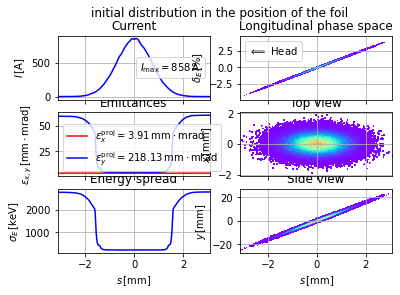

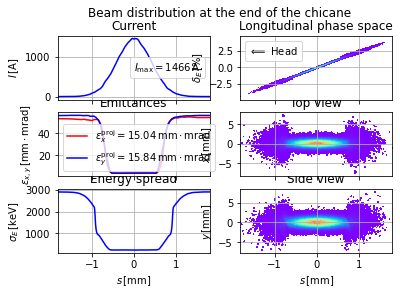

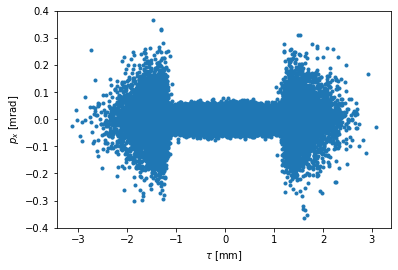

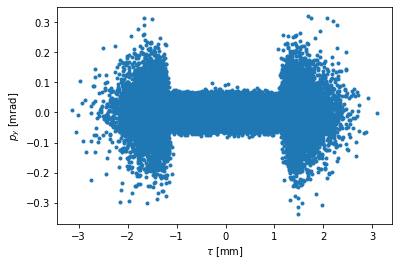

In [22]:
show_e_beam(cb1.parray, figname="Init", 
            title="initial distribution in the position of the foil")
show_e_beam(cb3.parray, figname="End of chicane", 
            title="Beam distribution at the end of the chicane")


plt.figure(100)
plt.plot(cb2.parray.tau()*1000, cb2.parray.px()*1000, ".")
plt.xlabel(r"$\tau$ [mm]")
plt.ylabel(r"$p_x$ [mrad]")
plt.figure(200)
plt.plot(cb2.parray.tau()*1000, cb2.parray.py()*1000, ".")
plt.xlabel(r"$\tau$ [mm]")
plt.ylabel(r"$p_y$ [mrad]")
plt.show()